<a href="https://colab.research.google.com/github/sarasiarek-coder/Poland-economy-refugees-analysis-/blob/main/notebooks/poland_ukraine_war_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

The goal of this analysis is to evaluate whether the inflow of Ukrainian refugees
had a measurable impact on employment and unemployment indicators in Poland.

Focus:
- Employment rate trends
- Unemployment trends
- Comparison before and after 2022


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style="whitegrid")


In [31]:
gdp = pd.read_csv("gdp_inflation_poland.csv")
refugees = pd.read_csv("refugees_poland.csv")
employment = pd.read_csv("poland_employment.csv")

In [32]:
gdp.head(), refugees.head()


(   Year  GDP_Growth  Inflation
 0  2019         4.5        2.2
 1  2020        -2.0        3.4
 2  2021         6.9        5.1
 3  2022         4.9       14.4
 4  2023         0.2       11.4,
    Year  Refugees
 0  2019    200000
 1  2020    300000
 2  2021    500000
 3  2022   2500000
 4  2023   1800000)

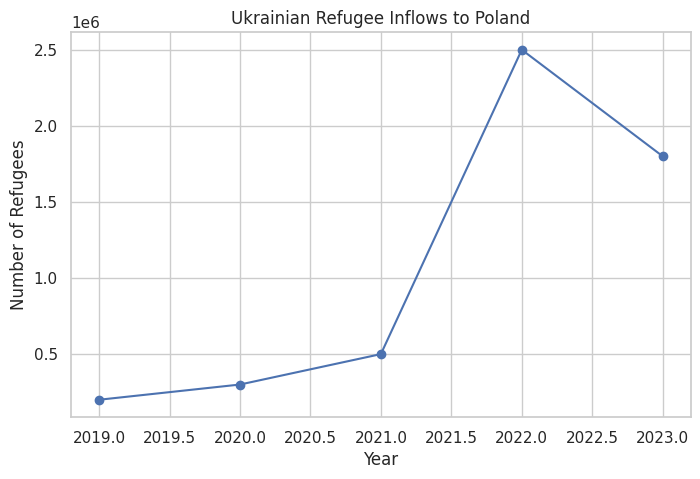

In [33]:
plt.figure(figsize=(8,5))
plt.plot(refugees["Year"], refugees["Refugees"], marker="o")
plt.title("Ukrainian Refugee Inflows to Poland")
plt.xlabel("Year")
plt.ylabel("Number of Refugees")
plt.show()


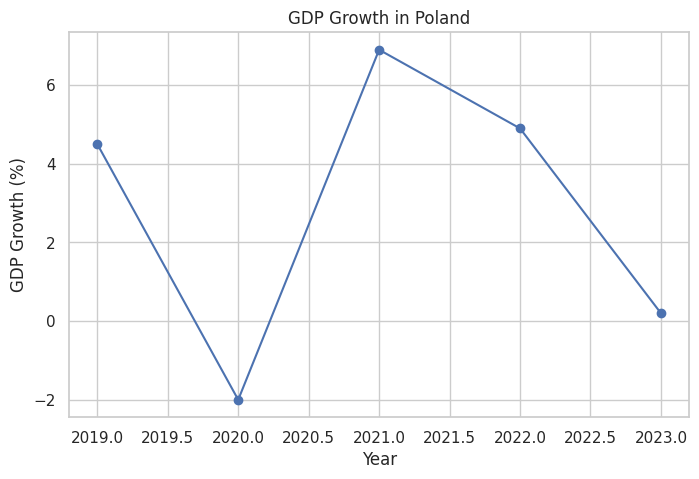

In [34]:
plt.figure(figsize=(8,5))
plt.plot(gdp["Year"], gdp["GDP_Growth"], marker="o")
plt.title("GDP Growth in Poland")
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.show()


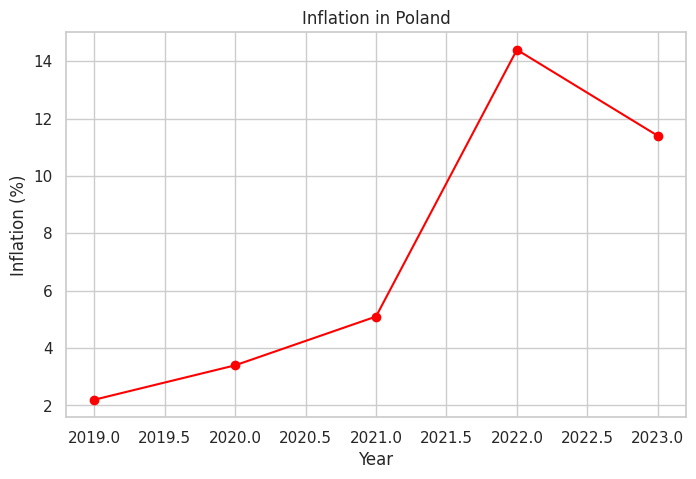

In [35]:
plt.figure(figsize=(8,5))
plt.plot(gdp["Year"], gdp["Inflation"], marker="o", color="red")
plt.title("Inflation in Poland")
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.show()


In [36]:
refugees = refugees.rename(columns={"Year": "year"})
gdp = gdp.rename(columns={"Year": "year"})
df = employment.merge(refugees, on="year").merge(gdp, on="year")
df["post_2022"] = (df["year"] >= 2022).astype(int)
df.head()

,year,employment_rate_total,employment_rate_male,employment_rate_female,unemployment_rate,Refugees,GDP_Growth,Inflation,post_2022
0,2019,68.5,75.5,61.4,3.2,200000,4.5,2.2,0
1,2020,68.8,75.9,61.6,3.2,300000,-2.0,3.4,0
2,2021,70.4,76.8,64.0,3.4,500000,6.9,5.1,0
3,2022,71.5,77.4,65.5,2.9,2500000,4.9,14.4,1
4,2023,72.4,77.8,66.9,2.8,1800000,0.2,11.4,1


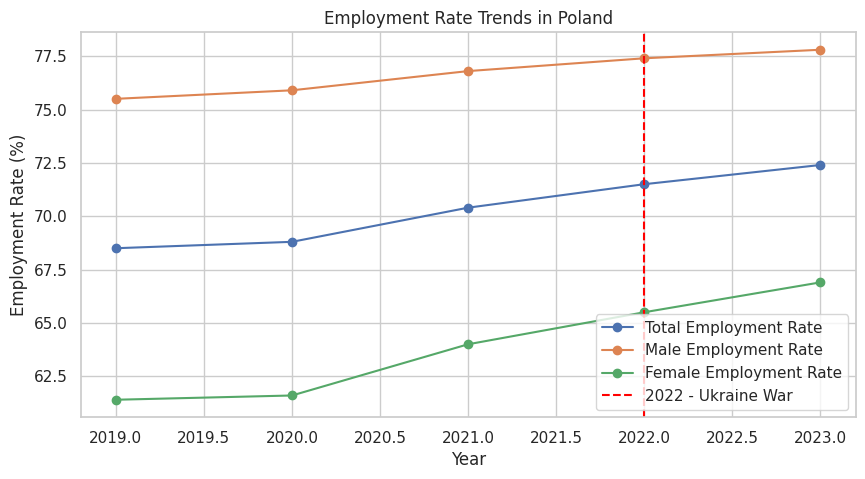

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df["year"], df["employment_rate_total"], marker='o', label="Total Employment Rate")
plt.plot(df["year"], df["employment_rate_male"], marker='o', label="Male Employment Rate")
plt.plot(df["year"], df["employment_rate_female"], marker='o', label="Female Employment Rate")
plt.axvline(2022, color='red', linestyle='--', label='2022 - Ukraine War')
plt.title("Employment Rate Trends in Poland")
plt.xlabel("Year")
plt.ylabel("Employment Rate (%)")
plt.legend()
plt.show()


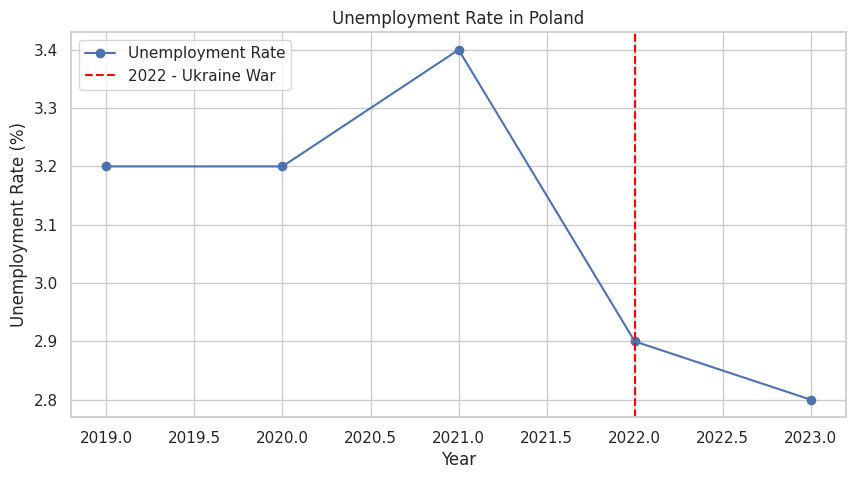

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df["year"], df["unemployment_rate"], marker='o', label="Unemployment Rate")
plt.axvline(2022, color='red', linestyle='--', label='2022 - Ukraine War')
plt.title("Unemployment Rate in Poland")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


In [39]:
merged = pd.merge(gdp, refugees, on="year")
merged

,year,GDP_Growth,Inflation,Refugees
0,2019,4.5,2.2,200000
1,2020,-2.0,3.4,300000
2,2021,6.9,5.1,500000
3,2022,4.9,14.4,2500000
4,2023,0.2,11.4,1800000


In [40]:
merged[["GDP_Growth", "Inflation", "Refugees"]].corr()


,GDP_Growth,Inflation,Refugees
GDP_Growth,1.000000,0.067596,0.065419
Inflation,0.067596,1.000000,0.995129
Refugees,0.065419,0.995129,1.000000


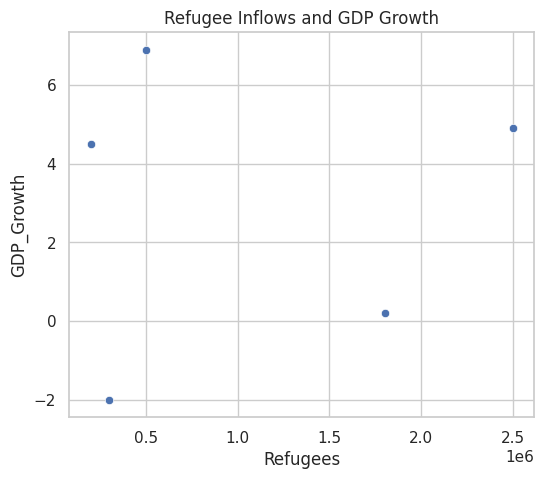

In [41]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=merged, x="Refugees", y="GDP_Growth")
plt.title("Refugee Inflows and GDP Growth")
plt.show()


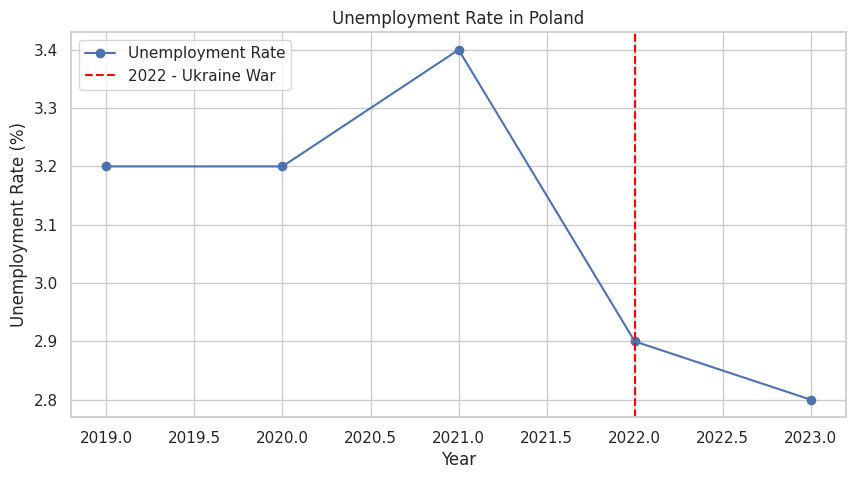

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df["year"], df["unemployment_rate"], marker='o', label="Unemployment Rate")
plt.axvline(2022, color='red', linestyle='--', label='2022 - Ukraine War')
plt.title("Unemployment Rate in Poland")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


## Interpretation

The regression results suggest that the increase in Ukrainian refugees in 2022
did not cause a structural decrease in Poland's total employment rate.
Employment continued to grow, indicating that the labor market was able to absorb
the influx, possibly due to labor shortages, sectoral demand, or policy measures.
  
## Limitations

- National-level aggregated data
- Short post-war time horizon (only 2022–2023)
- No sector-specific employment data
- Causal conclusions are limited due to simple model
